### Add authentication credentials to access Big Query API

In [1]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="/Users/psparks/Documents/Springboard/GDELT Testing-31a7081b0cbc.json"

### The BigQuery Python client library provides a magic command that allows you to run queries with minimal code. To load the magic commands from the client library, paste the following code into the first cell of the notebook.

In [2]:
# %load_ext google.cloud.bigquery

### The BigQuery client library provides a cell magic,  _%%bigquery_, which runs a SQL query of all French BigQuery events since Feb. 1 2016 and returns the results as a Pandas DataFrame.

In [9]:
# %%bigquery france_subset
# SELECT *
# FROM `gdelt-bq.full.events`
# WHERE ActionGeo_CountryCode = 'FR' AND MonthYear >= 201601

In [10]:
france_subset.shape

(3103885, 58)

### After downloading data, save it for future use

In [11]:
france_subset.to_csv('france_subset_1619_2.csv.bz2', header = True, compression='bz2')

### Now read it back for future data wrangling

In [12]:
import pandas as pd
import numpy as np
import sqlite3

In [ ]:
france_subset = pd.read_csv('france_subset_1619_2.csv.bz2', compression='bz2')

In [89]:
france_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3103885 entries, 0 to 3103884
Data columns (total 59 columns):
Unnamed: 0               int64
GLOBALEVENTID            int64
SQLDATE                  int64
MonthYear                int64
Year                     int64
FractionDate             float64
Actor1Code               object
Actor1Name               object
Actor1CountryCode        object
Actor1KnownGroupCode     object
Actor1EthnicCode         object
Actor1Religion1Code      object
Actor1Religion2Code      object
Actor1Type1Code          object
Actor1Type2Code          object
Actor1Type3Code          object
Actor2Code               object
Actor2Name               object
Actor2CountryCode        object
Actor2KnownGroupCode     object
Actor2EthnicCode         object
Actor2Religion1Code      object
Actor2Religion2Code      object
Actor2Type1Code          object
Actor2Type2Code          object
Actor2Type3Code          object
IsRootEvent              int64
EventCode                int

In [14]:
france_subset.head()

,Unnamed: 0,GLOBALEVENTID,SQLDATE,MonthYear,Year,FractionDate,Actor1Code,Actor1Name,Actor1CountryCode,Actor1KnownGroupCode,...,Actor2Geo_FeatureID,ActionGeo_Type,ActionGeo_FullName,ActionGeo_CountryCode,ActionGeo_ADM1Code,ActionGeo_Lat,ActionGeo_Long,ActionGeo_FeatureID,DATEADDED,SOURCEURL
0,0,523961397,20160324,201603,2016,2016.230100,NaN,NaN,NaN,NaN,...,FR,1,France,FR,FR,46.0000,2.00000,FR,20160324,http://www.goldcoastbulletin.com.au/news/natio...
1,1,521622559,20160316,201603,2016,2016.208200,NaN,NaN,NaN,NaN,...,FR,1,France,FR,FR,46.0000,2.00000,FR,20160316,http://www.newsmax.com/TheWire/italy-unsold-fo...
2,2,516418595,20160229,201602,2016,2016.161621,NaN,NaN,NaN,NaN,...,FR,1,France,FR,FR,46.0000,2.00000,FR,20160229,http://www.irishtimes.com/life-and-style/peopl...
3,3,522928257,20160321,201603,2016,2016.221900,NaN,NaN,NaN,NaN,...,FR,1,France,FR,FR,46.0000,2.00000,FR,20160321,http://www.ibtimes.co.uk/malaysia-palm-oil-cou...
4,4,538837301,20160510,201605,2016,2016.356200,NaN,NaN,NaN,NaN,...,-1409795,4,"French Riviera, France (general), France",FR,FR00,43.5599,7.13672,-1409795,20160510,http://movies.ndtv.com/bollywood/en-route-cann...


In [18]:
france_events = france_subset[['SQLDATE', 'Actor1Name', 'Actor2Name', 'SOURCEURL', 'MonthYear', 'EventRootCode', 'GoldsteinScale', 'NumMentions', 'AvgTone', 'ActionGeo_CountryCode', 'ActionGeo_Lat', 'ActionGeo_Long']]

In [19]:
france_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3103885 entries, 0 to 3103884
Data columns (total 12 columns):
SQLDATE                  int64
Actor1Name               object
Actor2Name               object
SOURCEURL                object
MonthYear                int64
EventRootCode            int64
GoldsteinScale           float64
NumMentions              int64
AvgTone                  float64
ActionGeo_CountryCode    object
ActionGeo_Lat            float64
ActionGeo_Long           float64
dtypes: float64(4), int64(4), object(4)
memory usage: 284.2+ MB


### Convert SQLDATE to datetime format

In [24]:
import pandas as pd
france_events.SQLDATE = pd.to_datetime(france_subset.SQLDATE, format = '%Y%m%d')

/Users/psparks/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [25]:
france_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3103885 entries, 0 to 3103884
Data columns (total 12 columns):
SQLDATE                  datetime64[ns]
Actor1Name               object
Actor2Name               object
SOURCEURL                object
MonthYear                int64
EventRootCode            int64
GoldsteinScale           float64
NumMentions              int64
AvgTone                  float64
ActionGeo_CountryCode    object
ActionGeo_Lat            float64
ActionGeo_Long           float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(4)
memory usage: 284.2+ MB


In [27]:
france_events.sort_values(by=['SOURCEURL'], ascending=True).iloc[:5]

,SQLDATE,Actor1Name,Actor2Name,SOURCEURL,MonthYear,EventRootCode,GoldsteinScale,NumMentions,AvgTone,ActionGeo_CountryCode,ActionGeo_Lat,ActionGeo_Long
334888,2016-02-23,MINIST,PARIS,"5 Kanal TV, Kiev/BBC Monitoring/(c) BBC",201602,4,1.0,1,-0.302115,FR,49.0000,0.00000
1571981,2016-02-23,UKRAINE,GOVERNMENT OFFICIAL,"5 Kanal TV, Kiev/BBC Monitoring/(c) BBC",201602,4,7.0,1,3.021148,FR,49.0000,0.00000
1573287,2016-02-23,NaN,PARIS,"5 Kanal TV, Kiev/BBC Monitoring/(c) BBC",201602,4,1.0,8,3.021148,FR,48.8667,2.33333
491420,2017-03-09,DIPLOMAT,FRANCE,"5 Kanal TV, Kiev/BBC Monitoring/(c) BBC",201703,4,1.0,6,2.272727,FR,49.0000,0.00000
2045042,2017-03-09,UKRAINIAN,FRANCE,"5 Kanal TV, Kiev/BBC Monitoring/(c) BBC",201703,4,1.0,1,2.272727,FR,48.8667,2.33333


In [29]:
france_events.sample(10)

,SQLDATE,Actor1Name,Actor2Name,SOURCEURL,MonthYear,EventRootCode,GoldsteinScale,NumMentions,AvgTone,ActionGeo_CountryCode,ActionGeo_Lat,ActionGeo_Long
805106,2017-02-09,CHRISTIAN,NaN,http://www.huffingtonpost.co.uk/michael-waldma...,201702,11,-2.0,6,2.217036,FR,48.8667,2.333330
376154,2019-01-23,FRANCE,JOURNALIST,https://www.sunnewsonline.com/row-as-italy-acc...,201901,1,0.0,53,2.081044,FR,48.8667,2.333330
1222506,2018-06-09,NaN,FRANCE,http://www.foxnews.com/entertainment/2018/06/0...,201806,4,1.9,40,-3.105966,FR,50.0584,2.926240
2792304,2017-08-07,FRANCE,CHRISTIAN,http://www.catholic.org/news/hf/faith/story.ph...,201708,5,3.4,2,4.282655,FR,46.0000,2.000000
918772,2018-10-03,PRISON,FRANCE,https://www.reuters.com/article/us-france-gang...,201810,17,-5.0,3,-5.949008,FR,49.2567,2.484770
444099,2017-04-21,FRENCH,BELGIAN,http://www.albaniannews.com/index.php?idm=1245...,201704,17,-5.0,18,-4.606930,FR,48.8667,2.333330
1296450,2017-04-17,FRANCE,STUDENT,http://www.military-technologies.net/2017/04/1...,201704,4,2.8,12,2.179837,FR,47.3164,3.382380
476306,2016-12-02,FRANCE,NaN,http://everything2.com/user/Scriblerus/writeup...,201612,5,3.4,10,-0.322234,FR,49.1972,-0.326822
2671686,2016-04-12,AZERBAIJAN,ARMENIA,http://ecommerce-journal.com/2016/04/irans-pre...,201604,4,2.8,1,-4.255319,FR,48.8667,2.333330
2700816,2016-04-22,PRIME MINISTER,CHINA,http://la-kabylie.com/2016/04/22/ireland-sign-...,201604,1,0.0,1,1.459854,FR,48.8667,2.333330


### Notice how we can't see the full URLs yet? Let's try to change that.

In [30]:
pd.set_option('display.max_colwidth', -1)

In [31]:
france_events.sample(5)

,SQLDATE,Actor1Name,Actor2Name,SOURCEURL,MonthYear,EventRootCode,GoldsteinScale,NumMentions,AvgTone,ActionGeo_CountryCode,ActionGeo_Lat,ActionGeo_Long
1407870,2017-04-25,FRANCE,PRESIDENT,http://www.huffingtonpost.co.uk/entry/paris-police-officer-murdered_uk_58ff6e20e4b0b6f6014afe29,201704,19,-10.0,4,-5.725191,FR,48.8667,2.33333
1443513,2018-07-21,FRENCH,NaN,https://www.zerohedge.com/news/2018-07-21/democrats-panic-over-rising-star-ocasio-cortez-abolish-ice-beheads-fake-trump,201807,18,-10.0,1,-2.016807,FR,46.0000,2.00000
2278529,2017-05-02,GERMANY,ITALY,http://www.taiwannews.com.tw/en/news/3153704,201705,4,1.9,2,3.403141,FR,48.8667,2.33333
2679755,2016-04-12,NORWEGIAN,LUTHERAN,http://gaynewsnetwork.com.au/news/world/church-votes-for-same-sex-marriage-20920.html,201604,4,1.0,4,7.339450,FR,46.0000,2.00000
1631314,2018-10-07,THERESA MAY,NaN,https://www.theguardian.com/commentisfree/2018/oct/14/call-yourself-a-moderate-youre-just-avoiding-the-need-to-make-your-case,201810,1,0.0,5,-2.737940,FR,46.0000,2.00000


In [32]:
france_events.sample(5)

,SQLDATE,Actor1Name,Actor2Name,SOURCEURL,MonthYear,EventRootCode,GoldsteinScale,NumMentions,AvgTone,ActionGeo_CountryCode,ActionGeo_Lat,ActionGeo_Long
1308135,2018-06-04,PARIS,GENDARMERIE,http://internationalviewpoint.org/spip.php?article5549,201806,14,-6.5,2,-4.383007,FR,48.8667,2.33333
2203600,2017-01-14,MADRID,PRISONER,https://nz.news.yahoo.com/world/a/34026932/thousands-rally-in-spain-for-eta-prisoner-amnesty/,201701,14,-6.5,10,-9.473684,FR,46.0000,2.00000
2100873,2019-01-17,FRENCH,ASSAILANT,https://www.thelocal.fr/20190117/riot-control-guns-whats-all-the-fuss-about-flash-balls-in-france,201901,19,-10.0,2,-5.521472,FR,48.8667,2.33333
1243226,2016-05-28,AZERBAIJAN,PARLIAMENT,http://today.az/news/politics/151126.html,201605,1,0.0,2,0.000000,FR,48.8667,2.33333
1357856,2016-11-29,NaN,BUSINESS,http://www.4-traders.com/ORANGE-SA-4649/news/Orange-Wireless-Smart-Home-Technology-Leader-Chooses-Orange-Business-Services-to-Boost-User-Experi-23470747/,201611,6,6.4,36,3.858262,FR,46.0000,2.00000


#### After grabbing the full URLs, we're able to see that the subjects in the stories match the actors listed in Actor1Name and Actor2Name.

### What are the top event root codes?

In [33]:
top_ten_event_roots = france_events.EventRootCode.value_counts()[:10]
top_ten_event_roots

4     823954
1     424064
5     275152
3     239370
11    203144
2     202037
19    199567
17    131519
8     112596
7     84503 
Name: EventRootCode, dtype: int64

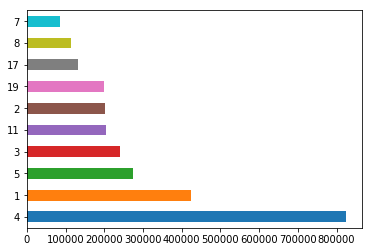

In [34]:
top_ten_event_roots.plot(kind='barh')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x279603710>]],
      dtype=object)

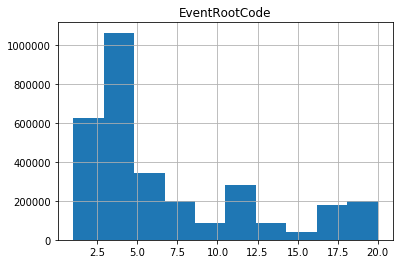

In [48]:
france_events.hist('EventRootCode')

In [44]:
print(france_events.EventRootCode.max(), france_events.EventRootCode.min())

20 1


In [45]:
france_events.EventRootCode.unique()

array([ 1,  4, 12, 19,  5,  3, 11, 16, 18,  8,  2, 13, 17,  9,  7,  6, 14,
       10, 15, 20])

### May want to use EventCode or EventBaseCode for more specificity.

### Top GoldsteinScale values?

In [40]:
top_ten_GoldsteinScale = france_events.GoldsteinScale.value_counts()[:10]
top_ten_GoldsteinScale

 0.0     293127
 1.9     264002
-2.0     263387
 2.8     241090
 4.0     214349
-10.0    195690
 1.0     193941
 7.0     191946
 3.4     189636
-5.0     168380
 3.0     165080
-4.0     81490 
 8.0     60633 
 0.4     60057 
 5.0     56801 
 7.4     53156 
-0.4     49301 
 6.0     40550 
 3.5     37072 
-9.0     35321 
-4.4     31518 
-6.5     30783 
 10.0    23560 
Name: GoldsteinScale, dtype: int64

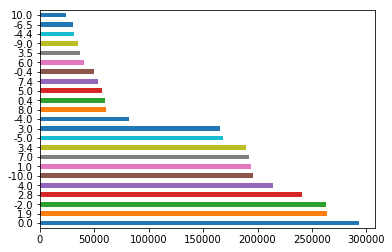

In [41]:
top_ten_GoldsteinScale.plot(kind='barh')

In [43]:
print(france_events.GoldsteinScale.max(), france_events.GoldsteinScale.min())

10.0 -10.0


In [46]:
france_events.GoldsteinScale.unique()

array([  0.        ,   1.89999998,  -4.        ,   1.9       ,
       -10.        ,   2.8       ,   1.        ,   8.        ,
         4.        ,  -2.        ,  -7.        ,  -9.        ,
        -0.4       ,   3.4       ,  -0.1       ,   7.        ,
         3.        ,  -5.        ,  -9.5       ,   5.        ,
         5.2       ,  -0.3       ,   3.5       ,   7.4       ,
         6.4000001 ,  -4.4       ,   7.4000001 ,   2.79999995,
        -6.5       ,   0.40000001,   8.3       ,  10.        ,
         6.        ,   9.        ,   0.4       ,   3.2       ,
        -8.        ,   6.4       ,   3.4000001 ,  -0.40000001,
         2.5       ,  -5.8       ,  -9.19999981,  -7.2       ,
        -9.2       ,  -0.30000001,  -7.5       ,   4.5       ,
         3.8       ,  -5.6       ,  -4.4000001 ,  -0.1       ,
         5.19999981,   8.5       ,          nan,   3.79999995,
        -5.5999999 ,  -7.19999981,   3.20000005,  -5.80000019,
         8.30000019])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x279657d68>]],
      dtype=object)

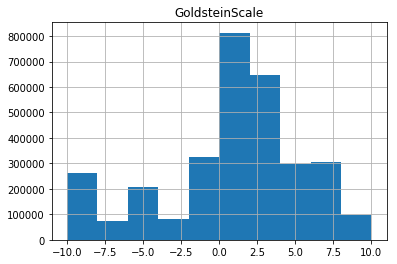

In [47]:
france_events.hist('GoldsteinScale')

### After looking at the 10 values for GoldsteinScale, still not sure what it means in context.

In [64]:
france_events.loc[france_events['GoldsteinScale'] == 10]

,SQLDATE,Actor1Name,Actor2Name,SOURCEURL,MonthYear,EventRootCode,GoldsteinScale,NumMentions,AvgTone,ActionGeo_CountryCode,ActionGeo_Lat,ActionGeo_Long
165,2016-02-05,IRANIAN,ISLAMIC,http://www.weupit.com/peugeot-to-take-part-in-a-400-million-euro-investment-in-iran/28515/,201602,8,10.0,1,-2.301255,FR,48.8667,2.333330
796,2016-02-22,BRITAIN,NaN,https://www.minnpost.com/foreign-concept/2016/02/would-britain-actually-vote-leave-european-union,201602,8,10.0,2,-0.229709,FR,46.0000,2.000000
977,2017-11-01,PRESIDENT,NaN,http://justsaynews.com/community-groups-call-on-ducey-to-commit-to-action-on-climate-change/,201711,8,10.0,2,1.351351,FR,48.8667,2.333330
1131,2017-10-30,PARIS,UNITED STATES,https://www.lombardiletter.com/has-donald-trump-called-global-warming-a-hoax/20337/,201710,8,10.0,4,-2.902557,FR,48.8667,2.333330
1796,2016-03-20,UNITED STATES,VOTER,http://www.ad-hoc-news.de/after-campaigns-in-which-president-obama-expanded-the--/de/News/48929143,201603,8,10.0,2,-4.137931,FR,46.0000,2.000000
2014,2016-05-01,NaN,FIJI,http://www.fijitimes.com/story.aspx?id=351956,201605,8,10.0,4,-1.096033,FR,46.0000,2.000000
2242,2016-04-30,NORWAY,NaN,http://www.wsbradio.com/ap/ap/business/in-norway-search-for-2-missing-bodies-after-deadly/nrFJr/,201604,8,10.0,22,-2.489300,FR,48.8667,2.333330
2864,2016-06-26,FRENCH,NaN,http://carolineclarkson.blogs.france24.com/article/2016/06/26/brexit-uk-france-referendum-constitution-people,201606,8,10.0,3,-3.595080,FR,46.0000,2.000000
3350,2016-05-21,BARACK OBAMA,IRAQ,http://lucenainformacion.com/2016/05/21/egyptian-military-finds-debris-of-crashed-airliner/,201605,8,10.0,2,-1.665799,FR,48.8667,2.333330
3440,2016-05-12,NaN,KIGALI,http://www.newtimes.co.rw/section/article/2016-05-13/199826/,201605,8,10.0,10,2.058824,FR,46.0000,2.000000


### Take a look at events per day

In [56]:
france_events.groupby("SQLDATE").size()

SQLDATE
2016-02-01    4141
2016-02-02    3399
2016-02-03    3148
2016-02-04    3073
2016-02-05    3358
2016-02-06    1799
2016-02-07    1758
2016-02-08    2773
2016-02-09    2700
2016-02-10    3119
2016-02-11    3246
2016-02-12    2893
2016-02-13    2104
2016-02-14    1785
2016-02-15    2669
2016-02-16    3456
2016-02-17    3061
2016-02-18    2814
2016-02-19    3058
2016-02-20    1804
2016-02-21    1507
2016-02-22    2404
2016-02-23    2666
2016-02-24    2773
2016-02-25    3082
2016-02-26    2482
2016-02-27    1658
2016-02-28    1520
2016-02-29    2442
2016-03-01    2985
              ... 
2019-05-23    2522
2019-05-24    2478
2019-05-25    1731
2019-05-26    2110
2019-05-27    2870
2019-05-28    2771
2019-05-29    2503
2019-05-30    2287
2019-05-31    1955
2019-06-01    1595
2019-06-02    1708
2019-06-03    2405
2019-06-04    2797
2019-06-05    4093
2019-06-06    7423
2019-06-07    3798
2019-06-08    1624
2019-06-09    1381
2019-06-10    2163
2019-06-11    2337
2019-06-12    2536
2019

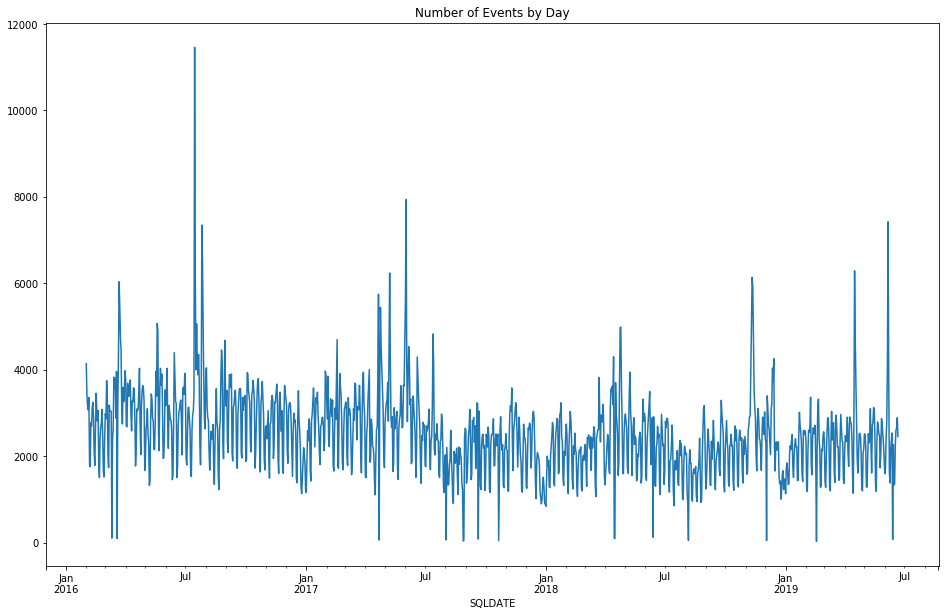

In [90]:
france_events.groupby("SQLDATE").size().plot(figsize=(16,10), title='Number of Events by Day')

### Get top days

In [59]:
france_events.groupby("SQLDATE").size().sort_values(ascending = False)[:10]

SQLDATE
2016-07-15    11460
2017-06-02    7938 
2019-06-06    7423 
2016-07-26    7347 
2016-07-27    6491 
2019-04-16    6289 
2017-05-08    6239 
2016-07-16    6197 
2018-11-11    6137 
2016-03-22    6036 
dtype: int64

### ...and bottom days.

In [60]:
france_events.groupby("SQLDATE").size().sort_values(ascending = True)[:10]

SQLDATE
2019-02-17    27
2017-08-28    38
2017-10-21    46
2018-12-03    50
2017-08-29    51
2018-08-06    51
2017-04-22    60
2017-08-02    64
2019-06-13    75
2017-09-20    83
dtype: int64

### What was occurring on these days?

In [62]:
france_events.loc[france_events['SQLDATE'] == '2016-07-15']

,SQLDATE,Actor1Name,Actor2Name,SOURCEURL,MonthYear,EventRootCode,GoldsteinScale,NumMentions,AvgTone,ActionGeo_CountryCode,ActionGeo_Lat,ActionGeo_Long
25140,2016-07-15,ITALY,POLICE OFFICER,http://newstodaynet.com/nation/consulates-security-being-beefed-kolkata,201607,1,0.0,4,-7.590759,FR,46.0000,2.00000
25183,2016-07-15,FRANCE,ISLAM,http://www.telegraphindia.com/1160717/jsp/foreign/story_97153.jsp,201607,1,0.0,1,-3.910615,FR,46.0000,2.00000
25234,2016-07-15,IRISH,DEPARTMENT OF FOREIGN AFFAIRS,http://www.independent.ie/world-news/war-on-terror/condition-of-irishman-struck-in-nice-truck-horror-deteriorates-34888739.html,201607,1,0.0,1,-6.148591,FR,48.8667,2.33333
25463,2016-07-15,VLADIMIR PUTIN,RUSSIA,http://www.europesun.com/index.php/sid/245865869,201607,4,2.8,1,-2.406417,FR,46.0000,2.00000
29817,2016-07-15,TERRORIST,BELGIUM,https://theconservativetreehouse.com/2017/07/14/part-iii-the-defeat-of-isis-more-from-u-s-special-envoy-brett-mcgurk/comment-page-1/,201607,19,-10.0,4,-0.251142,FR,48.8667,2.33333
29824,2016-07-15,NaN,EXTREMIST,http://www.military.com/daily-news/2017/07/14/bastille-day-france-gives-big-nod-us-annual-parade.html,201607,4,1.9,85,2.004680,FR,48.8667,2.33333
29903,2016-07-15,TERRORIST,SYRIAN,https://theconservativetreehouse.com/2017/07/14/part-iii-the-defeat-of-isis-more-from-u-s-special-envoy-brett-mcgurk/comment-page-1/,201607,19,-10.0,6,-0.251142,FR,48.8667,2.33333
129485,2016-07-15,PARIS,NaN,http://www.azcentral.com/story/news/world/2016/07/21/french-prosecutor-nice-attacker-had-accomplices/87386146/,201607,13,-7.0,4,-4.542100,FR,48.8667,2.33333
129554,2016-07-15,GENEVA,RUSSIA,http://www.panarmenian.net/eng/news/217465/Yerevan_hostage_standoff_French_envoy_hopes_for_peaceful_solution,201607,4,1.0,1,-3.174603,FR,46.0000,2.00000
129614,2016-07-15,UNITED NATIONS,GENEVA,http://www.panarmenian.net/eng/news/217465/Yerevan_hostage_standoff_French_envoy_hopes_for_peaceful_solution,201607,4,1.0,1,-3.174603,FR,46.0000,2.00000


#### On July 14, 2016, a truck-ramming terrorist attack occurred in Nice, France.

In [63]:
france_events.loc[france_events['SQLDATE'] == '2019-02-17']

,SQLDATE,Actor1Name,Actor2Name,SOURCEURL,MonthYear,EventRootCode,GoldsteinScale,NumMentions,AvgTone,ActionGeo_CountryCode,ActionGeo_Lat,ActionGeo_Long
83946,2019-02-17,FRANCE,MILITANT,https://www.dailysabah.com/war-on-terror/2019/02/19/europe-wary-of-trumps-call-to-take-daesh-captives-back,201902,17,-5.0,2,-3.638814,FR,48.8667,2.33333
84486,2019-02-17,FRENCH,FRANCE,https://www.dailysabah.com/war-on-terror/2019/02/19/europe-wary-of-trumps-call-to-take-daesh-captives-back,201902,1,0.0,6,-3.638814,FR,48.8667,2.33333
308241,2019-02-17,NaN,FRANCE,http://www.ft.lk/front-page/Rs--15-b-from-AFD-for-waste-water-disposal-project/44-673123,201902,5,8.0,6,-0.300300,FR,46.0000,2.00000
617502,2019-02-17,ALGERIAN,PARIS,https://www.middleeastmonitor.com/20190218-algeria-activists-call-for-protests-against-bouteflika-5th-term/,201902,12,-4.0,8,-0.778210,FR,48.8667,2.33333
704082,2019-02-17,FRANCE,FRANCE,http://www.ft.lk/front-page/Rs--15-b-from-AFD-for-waste-water-disposal-project/44-673123,201902,5,8.0,4,-0.300300,FR,46.0000,2.00000
704087,2019-02-17,ADMINISTRATION,FRENCH,https://www.rawstory.com/2019/02/conservative-columnist-savages-stephen-miller-trumps-emergency-wall-strategy/,201902,4,1.9,2,-6.572770,FR,46.0000,2.00000
923529,2019-02-17,ISRAELI,BELGIAN,https://jewishjournal.com/tag/french-jewish-philosopher/,201902,5,3.4,4,-3.768844,FR,48.8667,2.33333
923530,2019-02-17,ISRAELI,BELGIAN,https://jewishjournal.com/tag/french-jewish-philosopher/,201902,5,3.4,6,-3.768844,FR,48.8667,2.33333
992602,2019-02-17,ISRAELI,JEWISH,https://jewishjournal.com/tag/french-jewish-philosopher/,201902,5,3.4,6,-3.768844,FR,48.8667,2.33333
1015798,2019-02-17,PUBLICATION,NaN,http://www.swissinfo.ch/eng/new-media_french-speaking-media/44774108,201902,2,3.0,8,-0.153846,FR,46.0000,2.00000


#### Not sure what was occurring the day only 27 events were recorded.

### Scatterplot of Number of Mentions against Goldstein Scale

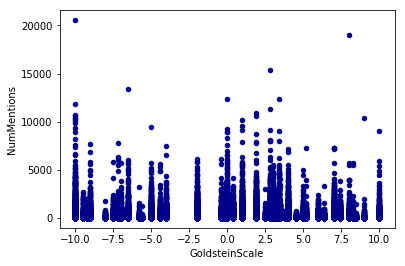

In [22]:
import matplotlib.pyplot as plt
ax1 = france_events.plot.scatter(x='GoldsteinScale', y='NumMentions',c='DarkBlue')
ax1

#### Almost no correlation between these two columns.

In [39]:
france_events[['NumMentions', 'GoldsteinScale']].corr()

,NumMentions,GoldsteinScale
NumMentions,1.000000,-0.015238
GoldsteinScale,-0.015238,1.000000


### A correlation of all numerical values within the france_subset

In [72]:
france_numeric = france_subset[['SQLDATE','GLOBALEVENTID' , 'MonthYear', 'Year', 'IsRootEvent','EventRootCode', 'EventBaseCode', 'EventCode', 'GoldsteinScale', 'NumMentions', 'NumSources', 'NumArticles', 'QuadClass', 'AvgTone', 'ActionGeo_CountryCode', 'ActionGeo_Lat', 'ActionGeo_Long']]

In [85]:
france_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3103885 entries, 0 to 3103884
Data columns (total 17 columns):
SQLDATE                  datetime64[ns]
GLOBALEVENTID            int64
MonthYear                int64
Year                     int64
IsRootEvent              int64
EventRootCode            int64
EventBaseCode            int64
EventCode                int64
GoldsteinScale           float64
NumMentions              int64
NumSources               int64
NumArticles              int64
QuadClass                int64
AvgTone                  float64
ActionGeo_CountryCode    object
ActionGeo_Lat            float64
ActionGeo_Long           float64
dtypes: datetime64[ns](1), float64(4), int64(11), object(1)
memory usage: 402.6+ MB


In [77]:
france_numeric.head()

,SQLDATE,GLOBALEVENTID,MonthYear,Year,IsRootEvent,EventRootCode,EventBaseCode,EventCode,GoldsteinScale,NumMentions,NumSources,NumArticles,QuadClass,AvgTone,ActionGeo_CountryCode,ActionGeo_Lat,ActionGeo_Long
0,2016-03-24,523961397,201603,2016,0,1,10,10,0.0,84,10,84,1,-2.747776,FR,46.0000,2.00000
1,2016-03-16,521622559,201603,2016,1,1,14,14,0.0,2,1,2,1,-0.643087,FR,46.0000,2.00000
2,2016-02-29,516418595,201602,2016,1,4,42,42,1.9,8,2,8,1,0.675454,FR,46.0000,2.00000
3,2016-03-21,522928257,201603,2016,0,12,120,120,-4.0,10,2,10,3,-5.533493,FR,46.0000,2.00000
4,2016-05-10,538837301,201605,2016,1,4,42,42,1.9,2,1,2,1,0.000000,FR,43.5599,7.13672


In [80]:
france_numeric.isna().count()

SQLDATE                  3103885
GLOBALEVENTID            3103885
MonthYear                3103885
Year                     3103885
IsRootEvent              3103885
EventRootCode            3103885
EventBaseCode            3103885
EventCode                3103885
GoldsteinScale           3103885
NumMentions              3103885
NumSources               3103885
NumArticles              3103885
QuadClass                3103885
AvgTone                  3103885
ActionGeo_CountryCode    3103885
ActionGeo_Lat            3103885
ActionGeo_Long           3103885
dtype: int64

,GLOBALEVENTID,MonthYear,Year,IsRootEvent,EventRootCode,EventBaseCode,EventCode,GoldsteinScale,NumMentions,NumSources,NumArticles,QuadClass,AvgTone,ActionGeo_Lat,ActionGeo_Long
GLOBALEVENTID,1.000000,0.999156,0.998961,-0.198881,-0.222314,-0.223749,-0.247250,0.156923,-0.243988,-0.233485,-0.244539,-0.215242,0.080731,-0.158729,-0.162994
MonthYear,0.999156,1.000000,0.999990,-0.198246,-0.217168,-0.218604,-0.243539,0.151692,-0.243336,-0.232896,-0.243889,-0.210056,0.074976,-0.157810,-0.165725
Year,0.998961,0.999990,1.000000,-0.198177,-0.216694,-0.218129,-0.243157,0.151230,-0.243328,-0.232901,-0.243881,-0.209580,0.074550,-0.157816,-0.165930
IsRootEvent,-0.198881,-0.198246,-0.198177,1.000000,-0.113655,-0.114247,-0.140494,0.077284,-0.041983,-0.046448,-0.041913,-0.113759,0.140186,-0.141543,-0.088123
EventRootCode,-0.222314,-0.217168,-0.216694,-0.113655,1.000000,0.999988,0.737580,-0.977542,-0.134529,-0.136999,-0.134833,0.999435,-0.699799,-0.052089,-0.035010
EventBaseCode,-0.223749,-0.218604,-0.218129,-0.114247,0.999988,1.000000,0.739675,-0.976617,-0.136093,-0.138584,-0.136397,0.999353,-0.700039,-0.052115,-0.035937
EventCode,-0.247250,-0.243539,-0.243157,-0.140494,0.737580,0.739675,1.000000,-0.678212,-0.186854,-0.187779,-0.186954,0.738650,-0.577070,-0.058175,-0.063747
GoldsteinScale,0.156923,0.151692,0.151230,0.077284,-0.977542,-0.976617,-0.678212,1.000000,0.054750,0.055535,0.055033,-0.980512,0.696141,0.018123,0.000432
NumMentions,-0.243988,-0.243336,-0.243328,-0.041983,-0.134529,-0.136093,-0.186854,0.054750,1.000000,0.965425,0.999961,-0.126449,-0.140581,-0.038668,-0.102411
NumSources,-0.233485,-0.232896,-0.232901,-0.046448,-0.136999,-0.138584,-0.187779,0.055535,0.965425,1.000000,0.966943,-0.128423,-0.154774,-0.027007,-0.102146


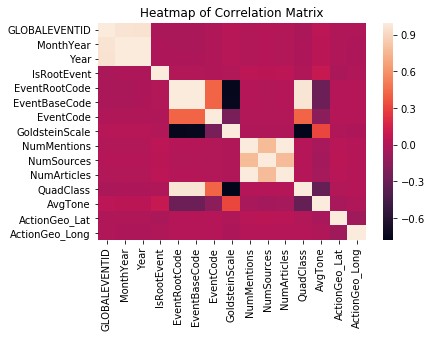

In [87]:
import seaborn as sns
france_heatmap = france_numeric.corr()
france_heatmap = (france_heatmap)
sns.heatmap(france_heatmap, 
            xticklabels= france_heatmap.columns.values,
            yticklabels= france_heatmap.columns.values)
plt.title('Heatmap of Correlation Matrix')
france_heatmap.corr()